In [1]:
import pandas as pd

## 2. Основы обработки таблиц с данными

### 2.2 Операции со столбцами

In [2]:
data = pd.read_csv("https://stepik.org/media/attachments/lesson/802033/students.csv")

In [4]:
data.sample(5)

,Age,Growth,Shoe size,Course number,Year of birth,Friend number,Russian rating,Maths rating,Physics rating,Computer science rating,...,Social network duration min,Chocolate,City population,Strange people,Your insitute,Brother-sister,Plane seat,MIddle and index finger,Middle and ring finger,Middle and little finger
3,19,168,38,2,2003,604,72,0,0,0,...,200,Баунти,900000.0,СоцГум,Юридический,есть сестра,У окна (пардон: у иллюминатора),12,13.5,35.0
19,21,164,38,3,2001,526,79,79,72,78,...,180,Баунти,880000.0,Естественный (биология-химия-физика-технари),Математический и ИТ,есть сестра,У окна (пардон: у иллюминатора),2,1.0,4.0
136,18,173,40,2,2003,208,88,62,0,0,...,120,Сникерс,999999.0,СоцГум,Юридический,есть сестра,У окна (пардон: у иллюминатора),5,10.0,20.0
56,21,163,38,37,2001,66,94,74,64,81,...,160,Милки Вей,800000.0,Математический и ИТ,Математический и ИТ,есть сестра,У окна (пардон: у иллюминатора),11,7.0,30.0
112,18,183,44,1,2003,200,66,72,0,78,...,120,Сникерс,850000.0,Математический и ИТ,Математический и ИТ,есть сестра,У окна (пардон: у иллюминатора),9,8.0,31.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

Какой рост у человека с индексом 12 в таблице? 

In [14]:
data.iloc[[12]]["Growth"]

12    169
Name: Growth, dtype: int64

Какой рост у восемнадцатого человека с конца таблицы?

In [16]:
data.iloc[[-18]]["Growth"]

168    161
Name: Growth, dtype: int64

Чему равно среднее значение веса студентов? Дать ответ с погрешностью 0,01

In [17]:
data["Weight"].mean()

64.03184713375796

Чему равно медианное значение веса студентов?

In [18]:
data["Weight"].median()

60.0

Чему равен вес самого "лёгкого" студента. Спойлер: у этого студента есть чувство юмора

In [19]:
data["Weight"].min()

3.0

Чему равно максимальное значение веса студента в таблице?

In [20]:
data["Weight"].max()

120.0

Сколько людей выбирает "Ножницы" при игре в "Камень-Ножницы-Бумагу"?

In [24]:
data["Rock paper scissors"].value_counts()

Rock paper scissors
Ножницы    88
Камень     60
Бумага     38
Name: count, dtype: int64

In [23]:
data["Rock paper scissors"].value_counts().loc["Ножницы"]

88

Чему равен вес десятого по счету человека в таблице и какой у него пол? 

In [27]:
data.iloc[[9]][["Weight", "Sex"]]

,Weight,Sex
9,58.0,женский


### 2.3 Селекция таблиц

Чему равен рост человека с максимальным весом?

In [30]:
data[data["Weight"] == data["Weight"].max()]["Growth"]

7    180
Name: Growth, dtype: int64

 Создайте две новых таблицы: army_persons - это все студенты, которых могут призвать в армию из-за отчисления, и free_persons - это те, кого не призовут.

Подсчитайте среднюю длину волос у студентов таблиц army_persons и free_persons .

В ответ запишите среднюю длину волос студентов из army_persons

In [34]:
data["Army"].value_counts(dropna=False)

Army
не призовут (по разным причинам)    149
могут призвать                       37
Name: count, dtype: int64

In [35]:
army_persons = data[data["Army"] == "могут призвать"]
free_persons = data[data["Army"] == "не призовут (по разным причинам)"]

In [39]:
print(army_persons["Hair length"].mean())
print(free_persons["Hair length"].mean())

11.045945945945945
40.15570469798658


***Верна ли гипотеза: "Чтобы избежать призыва, нужно всего-лишь отрастить волосы подлиннее"?***

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

<Axes: xlabel='Hair length', ylabel='Count'>

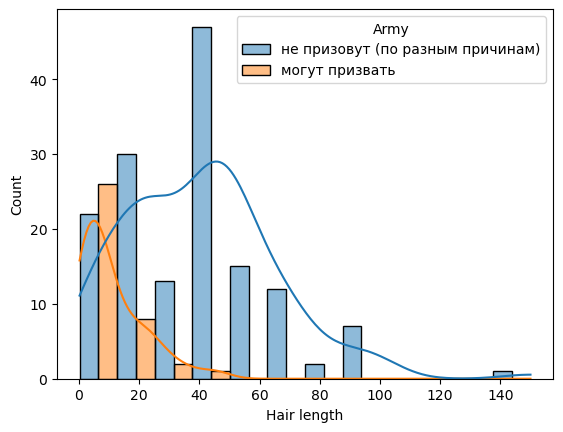

In [59]:
import seaborn as sns

sns.histplot(data=data, x="Hair length", hue="Army", multiple="dodge", kde=True)

*scipy.stats.pointbiserialr*

Точечная бисериальная корреляция используется для измерения взаимосвязи между бинарной переменной x и непрерывной переменной y. Как и другие коэффициенты корреляции, этот варьируется от -1 до +1, причем 0 означает отсутствие корреляции. Корреляции -1 или +1 подразумевают определяющую связь.

*https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html*

In [ ]:
from scipy.stats import pointbiserialr

In [42]:
data["Sex_code"], _ = pd.factorize(data["Sex"])
data["Army_code"], _ = pd.factorize(data["Army"])

In [88]:
# Вычисляем коэффициент корреляции точек-бисериации
point_biserial_corr, p_value = pointbiserialr(data["Hair length"], data["Army_code"])

# Выводим результаты
print("Коэффициент корреляции точек-бисериации:", point_biserial_corr)
print("p-значение:", p_value)

# Оцениваем статистическую значимость
alpha = 0.05
if p_value < alpha:
    print("Корреляция статистически значима.")
else:
    print("Корреляция не является статистически значимой.")

Коэффициент корреляции точек-бисериации: -0.45386532106310684
p-значение: 7.7132215111374e-11
Корреляция статистически значима.


Объясняется тем, что в выборке есть также девушки. Длинные волосы - нет возможности получить призыв.

Посмотрим только для мужчин

In [90]:
data_men = data[data["Sex"] == "мужской"]

In [91]:
# Вычисляем коэффициент корреляции точек-бисериации
point_biserial_corr, p_value = pointbiserialr(
    data_men["Hair length"], data_men["Army_code"]
)

# Выводим результаты
print("Коэффициент корреляции точек-бисериации:", point_biserial_corr)
print("p-значение:", p_value)

# Оцениваем статистическую значимость
alpha = 0.05
if p_value < alpha:
    print("Корреляция статистически значима.")
else:
    print("Корреляция не является статистически значимой.")

Коэффициент корреляции точек-бисериации: -0.038799274472147934
p-значение: 0.757092767626263
Корреляция не является статистически значимой.


Корреляция не является статистически значимой, и может быть случайной, мы не можем отклонить нулевую гипотезу

---

Найдите всех студентов, у которых 0 друзей в социальных сетях. Сколько среди них женщин и мужчин?

In [62]:
data[data["Friend number"] == 0]["Sex"].value_counts(dropna=False)

Sex
мужской    1
женский    1
Name: count, dtype: int64

Проверим гипотезу: "Любители собак в основном живут на нижних этажах домов" (типа иначе выгуливать лень). 

Создайте таблицу dor_lovers - это все студенты, которые любят собак. 

В ответ запишите долю (процент) из них, которые живут на первом этаже. Ответ округлить до целого количества процентов. 

In [64]:
dor_lovers = data[data["Animal"] == "Собак"]

In [66]:
dor_lovers["Floor number"].value_counts(normalize=True).sort_index()

Floor number
1     0.116667
2     0.083333
3     0.050000
4     0.200000
5     0.100000
6     0.083333
7     0.066667
8     0.033333
9     0.050000
10    0.033333
11    0.050000
12    0.033333
13    0.016667
14    0.033333
15    0.016667
16    0.016667
17    0.016667
Name: proportion, dtype: float64

In [68]:
print(dor_lovers["Floor number"].value_counts(normalize=True).iloc[[1]] * 100)

Floor number
1    11.666667
Name: proportion, dtype: float64


Получить две таблицы:

single_child - это все студенты у которых нет ни брата ни сестры

not_single_child - это все студенты у которых есть брат или сестра

In [74]:
single_child = data[data["Brother-sister"] == "нет ни брата ни сестры"]
not_single_child = data[~(data["Brother-sister"] == "нет ни брата ни сестры")]

Найдите медиану признака 'Social network duration min' (сколько времени студент проводит в соцсетях) отдельно для студентов таблицы  single_child  и таблицы not_single_child

В ответ напишите, на сколько минут медиана для таблицы single_child  больше медианы для таблицы not_single_chil

In [77]:
(
    single_child["Social network duration min"].median()
    - not_single_child["Social network duration min"].median()
)

60.0

Создайте три таблицы:

KFC_persons - студенты, которые ходят в KFC

Burger_persons - студенты, которые ходят в Burger king

Mac_persons - студенты, которые ходят в Макдональдс (aka "Вкусно и точка")

In [ ]:
KFC_persons = data[data["Fastfood"] == "KFC"]
Burger_persons = data[data["Fastfood"] == "Бургер кинг"]
Mac_persons = data[
    data["Fastfood"] == "Макдональдс (или как он там сейчас называется?)"
]

Для каждой категории студентов подсчитайте средний вес студентов.

В ответ напишите: на сколько средний вес студентов из KFC превышает средний вес студентов из Макдональдса.

In [83]:
print(
    KFC_persons["Weight"].mean(),
    Burger_persons["Weight"].mean(),
    Mac_persons["Weight"].mean(),
    sep="\n",
)

print(KFC_persons["Weight"].mean() - Mac_persons["Weight"].mean())

66.85915492957747
64.21739130434783
58.8
8.059154929577474


### 2.4 Влияние строк и столбцов друг на друга

Из имеющейся таблицы с анкетами наших студентов создайте "обрезанную таблицу" df_cut, состоящую из столбцов "Год рождения", "Рост", "Вес", "Длина волос", "Размер обуви".

Отсортируйте таблицу по возрастанию признака "Размер обуви". В ответ напишите год рождения студента, попавшего в первую строку отсортированной таблицы.

In [99]:
df_cut = data[["Year of birth", "Growth", "Weight", "Hair length", "Shoe size"]]

df_cut.sort_values(by='Shoe size')['Year of birth'].iloc[0]

2003

Отсортируйте таблицу по убыванию признака "Размер обуви". В ответ напишите год рождения студента, попавшего в третью строку отсортированной таблицы.

In [100]:
df_cut.sort_values(by="Shoe size", ascending=False)["Year of birth"].iloc[2]

2002

Отсортируйте таблицу по возрастанию признака "Размер обуви", а внутри группы студентов с одинаковым размером обуви сортировка должна производиться по возрастанию  признака "Рост".

В ответ напишите год рождения студента, попавшего в девятую строку отсортированной таблицы.

In [101]:
df_cut.sort_values(by=["Shoe size", "Growth"], ascending=[True, True])[
    "Year of birth"
].iloc[8]

1999

Отсортируйте таблицу по возрастанию признака "Размер обуви", а внутри группы студентов с одинаковым размером обуви сортировка должна производиться по убыванию признака "Рост".

В ответ напишите год рождения студента, попавшего во вторую строку отсортированной таблицы

In [102]:
df_cut.sort_values(by=["Shoe size", "Growth"], ascending=[True, False])[
    "Year of birth"
].iloc[1]

2002

Отсортируйте таблицу по убыванию признака "Размер обуви", а внутри группы студентов с одинаковым размером обуви сортировка должна производиться по возрастанию  признака "Рост".

В ответ напишите год рождения студента, попавшего во вторую строку отсортированной таблицы.

In [103]:
df_cut.sort_values(by=["Shoe size", "Growth"], ascending=[False, True])[
    "Year of birth"
].iloc[1]

2003

Допустим, что все студенты решили сделать себе прически типа "Ирокез".

Создайте новый столбец с названием 'Full length' ("Полный рост"), значения в котором равны сумме роста и длины волос. 

Чему равно максимальное значение признака "Полный рост" для наших студентов?

In [105]:
df_cut["Полный рост"] = df_cut["Growth"] + df_cut["Hair length"]

df_cut["Полный рост"].max()

C:\Users\asus\AppData\Local\Temp\ipykernel_21788\3344656055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut["Полный рост"] = df_cut["Growth"] + df_cut["Hair length"]


319.0

Выведите на экран таблицу со значениями коэффициента корреляции (КК). 

Чему равен КК для признаков "Рост" и "Размер обуви"? Ответ округлить до двух знаков после запятой.

In [109]:
df_cut.corr()

,Year of birth,Growth,Weight,Hair length,Shoe size,Полный рост
Year of birth,1.000000,-0.113357,0.006042,0.095402,-0.108360,0.064713
Growth,-0.113357,1.000000,0.544528,-0.554408,0.863252,-0.235492
Weight,0.006042,0.544528,1.000000,-0.319416,0.591149,-0.145316
Hair length,0.095402,-0.554408,-0.319416,1.000000,-0.567568,0.939398
Shoe size,-0.108360,0.863252,0.591149,-0.567568,1.000000,-0.307190
Полный рост,0.064713,-0.235492,-0.145316,0.939398,-0.307190,1.000000


In [108]:
df_cut.corr().loc["Growth", "Shoe size"]

0.8632524929552189

С помощью метода-молитвы groupby сделайте так, чтобы на экран вывелась табличка (числа в ней - это средние баллы за ЕГЭ)

In [114]:
data.groupby('Glasses')[['Russian rating', 'Maths rating']].mean()

,Russian rating,Maths rating
Glasses,,
да,83.388235,56.741176
нет,80.471910,59.955056
простите. не увидел(а) вопроса )))),77.900000,54.700000


In [115]:
data.groupby('Rock paper scissors')[['Russian rating', 'Maths rating']].mean()

,Russian rating,Maths rating
Rock paper scissors,,
Бумага,76.473684,52.894737
Камень,81.450000,62.166667
Ножницы,83.988636,57.738636


In [116]:
data.describe()

,Age,Growth,Shoe size,Course number,Year of birth,Friend number,Russian rating,Maths rating,Physics rating,Computer science rating,...,Putin age,Hair length,Floor number,Social network duration min,City population,MIddle and index finger,Middle and ring finger,Middle and little finger,Sex_code,Army_code
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,1.860000e+02,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000
mean,20.688172,170.661290,39.715054,3.500000,1991.107527,374.032258,81.634409,58.177419,13.182796,32.801075,...,690.236559,34.365054,6.322581,5.417500e+08,7.946669e+05,9.741935,9.705376,28.798925,0.354839,0.198925
std,3.468713,9.055881,2.814920,3.147285,132.099550,2199.541507,14.325019,29.575478,26.414552,38.992282,...,7360.321689,25.672211,4.338791,7.332267e+09,6.093052e+05,4.385241,6.894963,19.710011,0.479756,0.400269
min,17.000000,153.000000,34.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.200000,1.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,164.000000,38.000000,2.000000,2000.000000,74.500000,76.000000,50.000000,0.000000,0.000000,...,67.000000,12.000000,3.000000,1.200000e+02,7.000000e+05,7.000000,6.000000,20.000000,0.000000,0.000000
50%,20.000000,169.000000,39.000000,3.000000,2001.500000,130.000000,85.000000,70.000000,0.000000,0.000000,...,69.000000,30.000000,5.000000,2.000000e+02,8.000000e+05,10.000000,10.000000,28.500000,0.000000,0.000000
75%,21.000000,178.000000,42.000000,4.000000,2003.000000,236.000000,91.000000,76.750000,0.000000,75.000000,...,70.000000,50.000000,8.000000,3.600000e+02,8.845000e+05,12.000000,12.000000,35.000000,1.000000,0.000000
max,55.000000,197.000000,48.000000,37.000000,2004.000000,30000.000000,100.000000,100.000000,97.000000,98.000000,...,100000.000000,150.000000,20.000000,1.000000e+11,8.000000e+06,30.000000,80.000000,250.000000,1.000000,1.000000
